## We have seen the following aspects of Data :
* Data Collection
* Data Storage
* Data Manipulation
* Data Cleaning

### Let's more to the next level where we visualize the rather boring set of numbers!
![visualize](img/DataViz.PNG)

## Why the need of Data Visualization?
* Old saying : A picture speaks a thousand words
* It is crucial to know the shape of data, treat outliers etc.Visualization helps seeing the anomalies.
* In Data Science, we are always on a look out for trends or patterns
* Correlations are one of the most fundamental aspects of Data Science and finding them is easiest when visualized
* Visualizations are plain fun!

## Let's answer few IPL 2018 questions via Visualization
* Top 10 matches with highest scores


In [25]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
#set the width and height of matplotlib figure
mpl.rcParams['figure.figsize'] = [8.0, 4.0]

AttributeError: module 'matplotlib.pyplot' has no attribute 'label'

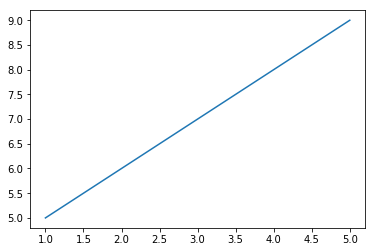

In [27]:
#plt.plot(x,y)
plt.plot([1,2,3,4,5],[5,6,7,8,9])
plt.label()
plt.show()

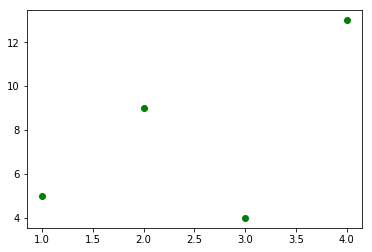

In [22]:
#plt.plot(x,y) ==> supplied separately
x = [1,2,3,4]
y = [5,9,4,13]
plt.plot(x,y,'go')
plt.show()

In [2]:
## top 10 matches with highest scores
df = pd.read_csv('data/iplfinal.csv',sep='|')
df.head(2)

,match_description,match_date,match_venue,match_location,match_result,team_name,innings_order,batsman_name,dismissal_mode,runs,balls,fours,sixes
0,"Mumbai Indians vs Chennai Super Kings, 1st Mat...",2018-04-07,"Wankhede Stadium,",Mumbai,Chennai Super Kings won by 1 wkt,Mumbai Indians Innings,innings_1,Rohit Sharma (c),c Rayudu b Watson,15,18,1,1
1,"Mumbai Indians vs Chennai Super Kings, 1st Mat...",2018-04-07,"Wankhede Stadium,",Mumbai,Chennai Super Kings won by 1 wkt,Mumbai Indians Innings,innings_1,Evin Lewis,lbw b D Chahar,0,2,0,0


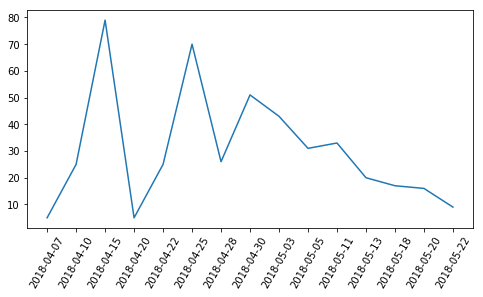

In [37]:
#let's see dhoni's performance match by match

y = df[df['batsman_name'].str.contains('Dhoni')].runs
#x = np.arange(1,len(y)+1)
x = df[df['batsman_name'].str.contains('Dhoni')].match_date
len(x)
plt.plot(x,y)
plt.xticks(rotation=60)
plt.show()
#z = y.runs/y.balls
#initializing the x-axis and y-axis

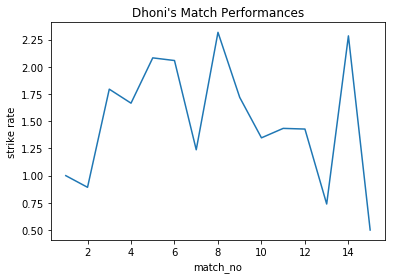

In [121]:
#let's see dhoni's performance match by match

y = df[df['batsman_name'].str.contains('Dhoni')]
z = y.runs/y.balls
x = np.arange(1,len(z)+1)
plt.plot(x,z)
plt.title('Dhoni\'s Match Performances')
plt.xlabel('match_no')
plt.ylabel('strike rate')
plt.show()
#z = y.runs/y.balls

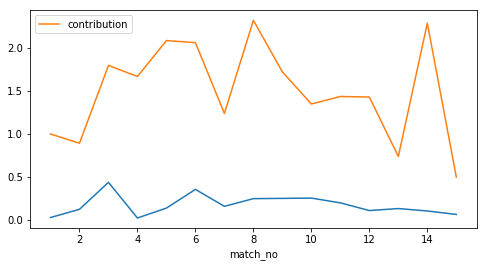

In [48]:
#compare dhoni's match contribution against his strike rate
a = df[df.batsman_name.str.contains('Dhoni')]
b = df[df.team_name.str.contains('Chennai')].groupby('match_description',as_index=False)
c = b[['runs']].sum()
d = pd.merge(a,c,on='match_description')
# calculate the match-wise contribution of Dhoni
e = d.runs_x/d.runs_y
# calculate the match-wise strike rate of Dhoni
f = a.runs/a.balls
# create common x-axis values
g = np.arange(1,len(f)+1)
plt.plot(g,e)
plt.plot(g,f,label='contribution')
plt.xlabel('match_no')
plt.legend(loc='best')
plt.show()

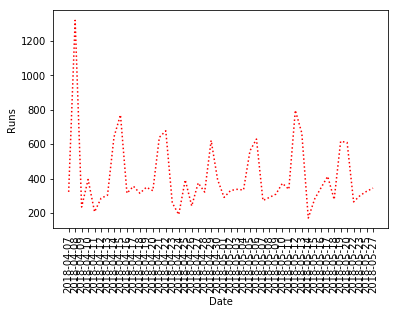

In [123]:
a = df.groupby('match_date')
b = a.runs.sum()   #.sort_values(ascending=False)
c = b.index.values
plt.plot(c,b,'r:')
plt.xlabel('Date')
plt.ylabel('Runs')

# Learning - how to rotate ugly looking axis labels?

plt.xticks(rotation=90)
plt.show()

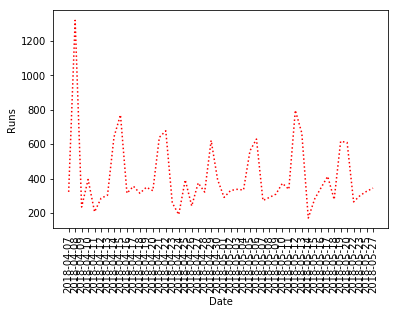

In [7]:
# grp = df.groupby('match_description')
a = df.groupby('match_date')
b = a.runs.sum()   #.sort_values(ascending=False)
c = b.index.values
plt.plot(c,b,'r:')
plt.xlabel('Date')
plt.ylabel('Runs')

# Learning - how to rotate ugly looking axis labels?

plt.xticks(rotation=90)
plt.show()

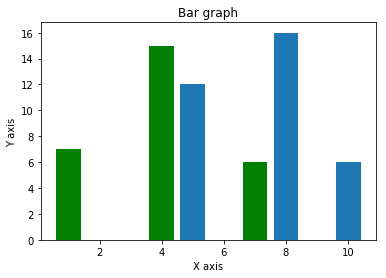

In [146]:
x = [5,8,10]
y = [12,16,6]  

x2 =[7,4,1]
y2 = [6,15,7] 
plt.bar(x, y, align = 'center') 
plt.bar(x2, y2, color = 'g', align = 'center') 
plt.title('Bar graph') 
plt.ylabel('Y axis') 
plt.xlabel('X axis')  
plt.show()

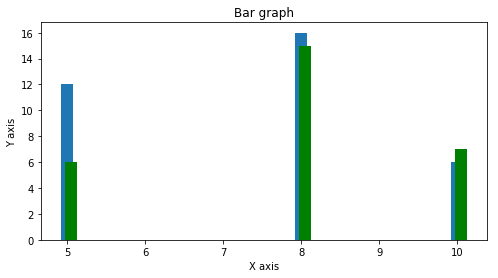

In [53]:
x = np.array([5,8,10])
y = [12,16,6]  

x2 =x+0.05
y2 = [6,15,7] 
plt.bar(x, y, align = 'center',width=.15) 
plt.bar(x2, y2, color = 'g', align = 'center',width=0.15) 
plt.title('Bar graph') 
plt.ylabel('Y axis') 
plt.xlabel('X axis')  
plt.show()

## Understanding Matplotlib Object Hierarchy
![image](img/mpl.png)
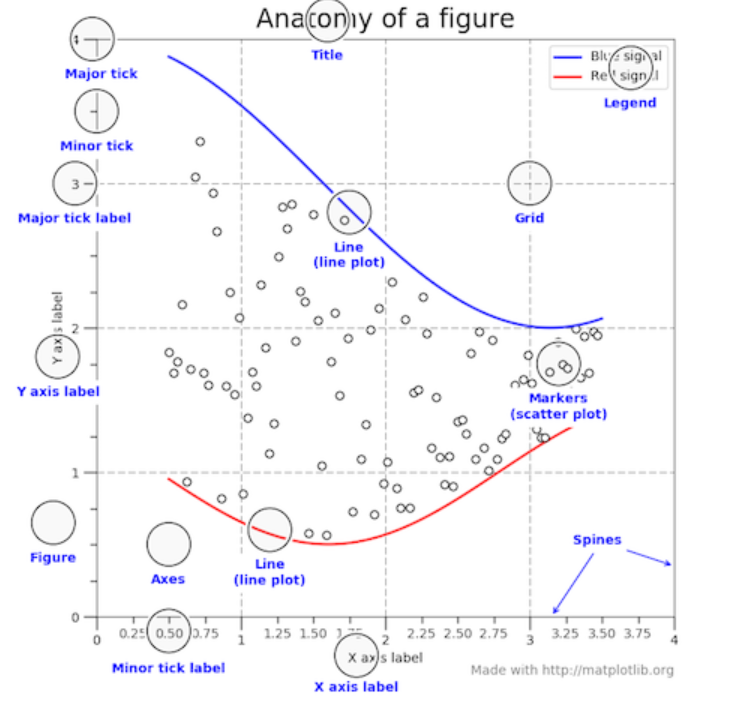

([<matplotlib.axis.XTick at 0x2074f39b2b0>,
 <a list of 5 Text xticklabel objects>)

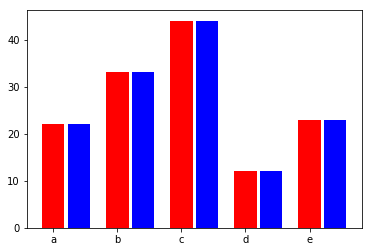

In [8]:
fig,ax = plt.subplots()
x = [1,2,3,4,5]
x = np.arange(5)
x = np.random.randint()
ax.bar(x,(22,33,44,12,23), color='r', width=0.35)
ax.bar(,(22,33,44,12,23), color='b', width=0.35)
plt.xticks(np.arange(5),('a','b','c','d','e'))

In [11]:
np.arange(1,10,2)

array([1, 3, 5, 7, 9])

<function matplotlib.pyplot.show>

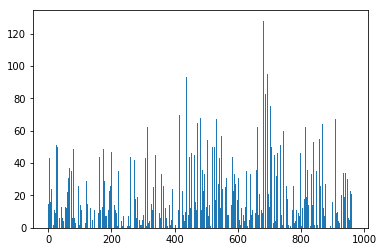

In [128]:
# lets create a histogram
a = df['runs']
b = np.arange(1,len(a)+1)
plt.bar(b,a)
plt.show

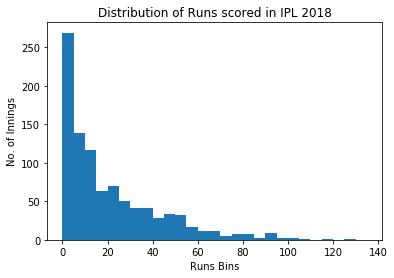

In [19]:
# lets create a histogram
a = df['runs']
#df.runs.mean()
b = np.arange(0,df.runs.max()+10,5)
plt.hist(a,b)
plt.title('Distribution of Runs scored in IPL 2018')
plt.xlabel('Runs Bins')
plt.ylabel('No. of Innings')
plt.show()

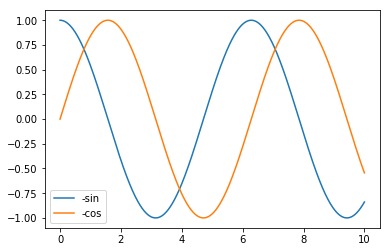

In [154]:
x = np.linspace(0,10,1000)
#creating figure, axes 
fig,ax = plt.subplots()
ax.plot(x,np.cos(x),label='-sin')
ax.plot(x,np.sin(x), label='-cos')
leg =ax.legend(loc='best')

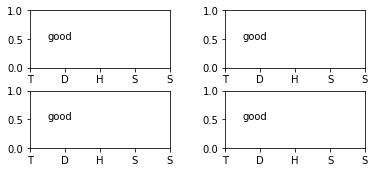

In [21]:
#Subplotting 
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,7):
    ax = fig.add_subplot(3,2,i)
    if(i % 2):
        ax.bar()
    else :
        ax.hist()
    ax.text(0.5,0.5, "good")
    plt.xticks(np.arange(5), ('T', 'D', 'H', 'S', 'S'))

C:\Users\Amit\Anaconda3\lib\site-packages\matplotlib\pyplot.py:3261: RuntimeWarning: Second argument 'b' is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)


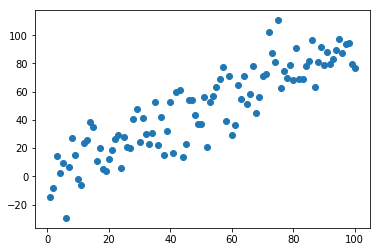

In [184]:
df=pd.DataFrame({'a': range(1,101), 'b': np.random.randn(100)*15+range(1,101)})
# plot
plt.plot( 'a','b',data=df, linestyle='none', marker='o')
plt.show()


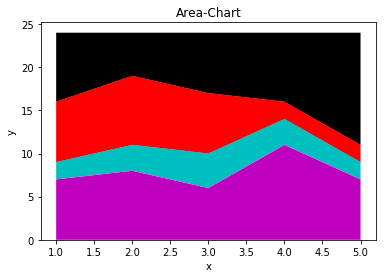

In [186]:
days = [1,2,3,4,5]
sleeping = [7,8,6,11,7]
eating =   [2,3,4,3,2]
working =  [7,8,7,2,2]
playing =  [8,5,7,8,13]

plt.stackplot(days, sleeping,eating,working,playing, colors=['m','c','r','k'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Area-Chart')
plt.show()

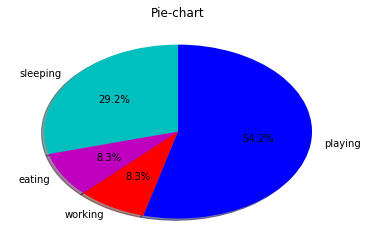

In [192]:
slices = [7,2,2,13]
activities = ['sleeping','eating','working','playing']
cols = ['c','m','r','b']

plt.pie(slices,
        labels=activities,
        colors=cols,
        startangle=90,
        shadow= True,
        #explode=(0,0.1,0,0)
        autopct='%1.1f%%'
        )

plt.title('Pie-chart')
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.subplots()
ax.bar(x,y,color='r')
ax.set_xlabels
ax.y_labels

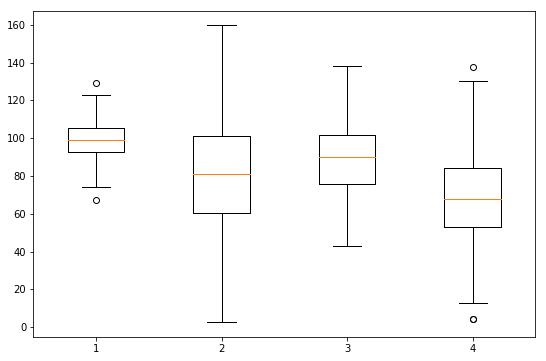

In [24]:
a = np.random.normal(100, 10, 200)
b = np.random.normal(80, 30, 200)
c = np.random.normal(90, 20, 200)
d = np.random.normal(70, 25, 200)

## combine these different collections into a list    
data_to_plot = [a, b, c, d]

# Create a figure instance
fig = plt.figure(figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)

# Save the figure
#fig.savefig('fig1.png', bbox_inches='tight')

In [22]:
a = np.random.normal(100, 10, 200)
a

array([105.13431721, 128.95842739, 110.91612729,  96.04596957,
       108.72176361, 105.35395668, 112.02086947,  97.2562689 ,
        99.14722286, 109.67555081,  80.14018923, 100.94738421,
        84.96377924, 100.19014912, 102.28968477, 104.36711494,
       115.87365397,  88.24986601, 117.32984549, 110.896062  ,
       117.78510813, 105.55672291, 116.80263549,  91.99081453,
        99.87614831, 101.19358797, 115.13322065, 105.49712642,
        99.08739497, 113.80727666,  89.92214393,  98.2831421 ,
        90.99254923, 100.99856288,  98.1073691 , 104.38492017,
        95.97868618,  96.89697111,  92.3691789 ,  98.03028577,
       103.21830348, 111.39282293,  87.75944263,  95.74697293,
       108.49453661, 102.94818856, 107.34708291, 106.34081995,
        96.1072527 , 103.8550855 ,  98.73200882, 115.71973808,
       106.4637607 ,  98.76093509, 106.1095072 , 118.62151529,
        95.72785899,  96.2862302 ,  96.55742956,  95.93366344,
       112.36224121,  94.76568706, 118.46161913,  89.88